In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [26]:
df = pd.read_csv('files/dataset.csv')
df.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Unemployed,Gold (Close),USD (Close),Oil (Close),Tourists,Cars
Date,,,,,,
2011-02-01,2150233.0,1339.599976,2.8199,101.739998,1232497.0,67610.0
2011-03-01,2133916.0,1430.699951,2.8954,115.419998,1449978.0,67610.0
2011-04-01,2043516.0,1428.099976,2.8224,118.699997,1510034.0,69213.0
2011-05-01,1962587.0,1485.250000,2.7942,116.614998,2006688.0,69213.0
2011-06-01,1883299.0,1542.400024,2.7660,114.529999,2254963.0,69213.0


In [27]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df.drop('Unemployed', axis=1))

colnames = list(df.columns)
colnames.remove('Unemployed')
scaled_df = pd.DataFrame(scaled, columns=colnames, index=df.index)
scaled_df

,Gold (Close),USD (Close),Oil (Close),Tourists,Cars
Date,,,,,
2011-02-01,-0.614140,-1.928724,0.919501,-1.266759,-1.316417
2011-03-01,-0.280834,-1.758497,1.446586,-1.014713,-1.316417
2011-04-01,-0.290346,-1.923087,1.572962,-0.945112,-1.254537
2011-05-01,-0.081252,-1.986668,1.492628,-0.369523,-1.254537
2011-06-01,0.127842,-2.050250,1.412294,-0.081788,-1.254537
...,...,...,...,...,...
2023-09-01,1.581804,1.050808,0.411296,1.440445,0.408040
2023-10-01,1.653149,1.139304,0.335778,0.762039,0.909527
2023-11-01,1.724493,1.227799,0.260260,0.232779,0.909527


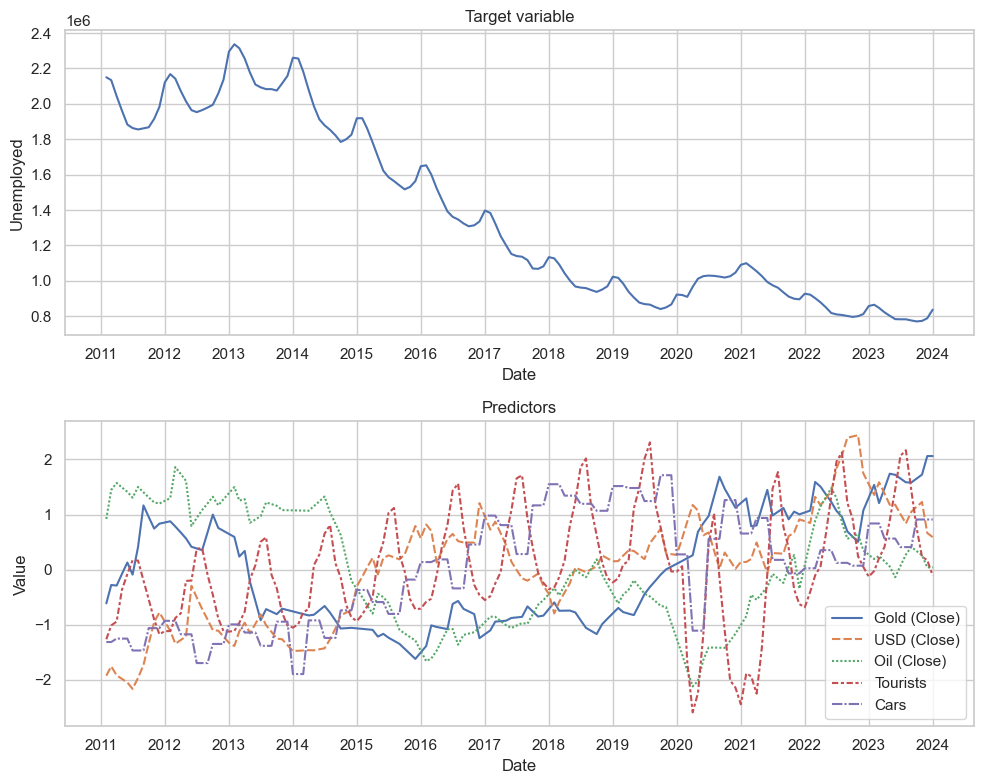

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(2,1, figsize=[10, 8])
sns.lineplot(df['Unemployed'], ax=ax[0])
sns.lineplot(scaled_df, ax=ax[1])

years = mdates.YearLocator()
ax[0].xaxis.set_major_locator(years)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax[1].xaxis.set_major_locator(years)
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax[1].set_ylabel('Value')
ax[0].set_title('Target variable')
ax[1].set_title('Predictors')

plt.tight_layout()
plt.show()

# SHAP

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [42]:
# all variables will be predicators
X = scaled_df
y = df['Unemployed'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# evaluate model on test set
y_pred = model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 22758035068.402588


In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 5), (32, 5), (124,), (32,))

In [44]:
res = pd.DataFrame(y_test)
res['y_pred'] = y_pred

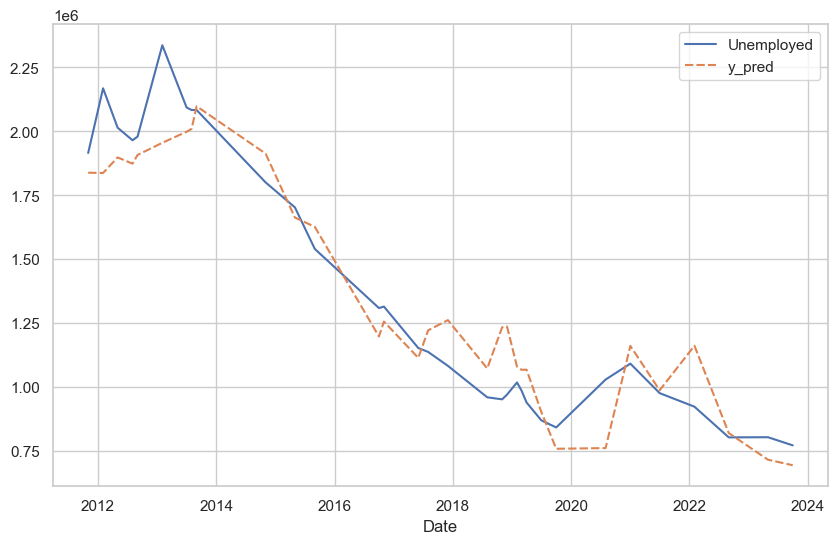

In [45]:
fig, ax = plt.subplots(figsize=[10, 6])
sns.lineplot(res)
plt.show()

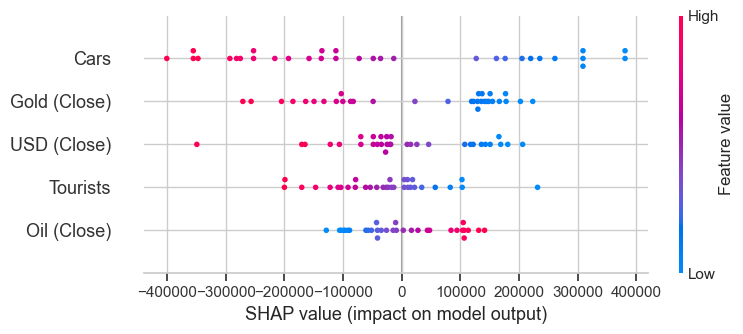

In [46]:
import shap

# Inicjalizacja Explainera SHAP z wytrenowanym modelem
explainer = shap.Explainer(model1, X_train) 

# Obliczenie wartości SHAP
shap_values = explainer(X_test)

# Wyświetlenie wyników
shap.summary_plot(shap_values, X_test)


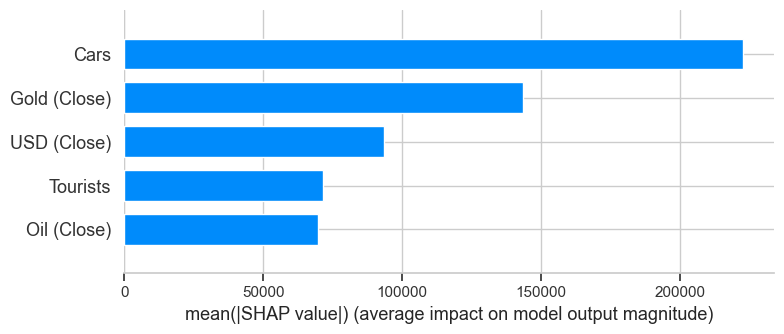

In [47]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

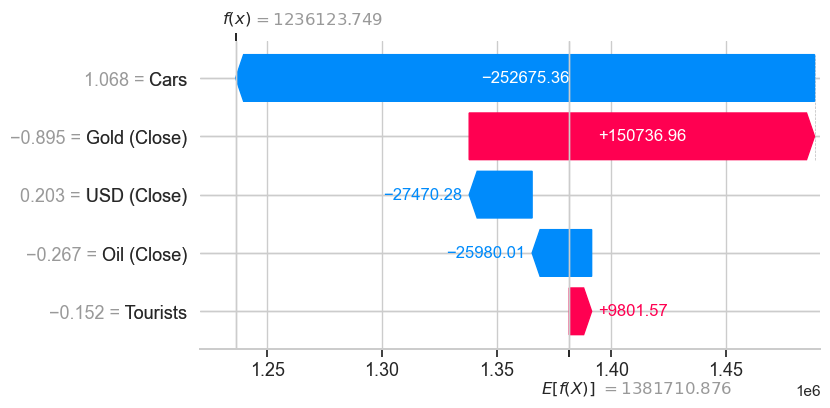

In [48]:
shap.plots.waterfall(shap_values[6])